In [68]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded ✅")

Libraries loaded ✅


In [69]:
# Cell B — generate fake dataset
import pandas as pd
import numpy as np

# создаём 200 строк фейковых транзакций
np.random.seed(42)
data = pd.DataFrame({
    "transaction_id": range(1, 201),
    "amount": np.random.normal(100, 30, 200).round(2),   # сумма транзакции
    "customer_id": np.random.randint(1000, 1020, 200),   # ID клиента
    "is_fraud": np.random.choice([0, 1], size=200, p=[0.9, 0.1])  # метка (норм/фрод)
})

# смотрим первые строки
data.head()

,transaction_id,amount,customer_id,is_fraud
0,1,114.90,1001,0
1,2,95.85,1016,0
2,3,119.43,1007,0
3,4,145.69,1000,0
4,5,92.98,1008,0


In [70]:
# Cell B — generate fake student dataset
import pandas as pd
import numpy as np

np.random.seed(42)

majors = ["CS", "Math", "Business", "Biology", "Engineering"]

students = pd.DataFrame({
    "student_id": range(1, 201),
    "age": np.random.randint(18, 25, 200),
    "major": np.random.choice(majors, 200),
    "gpa": np.round(np.random.normal(3.0, 0.5, 200), 2),
    "attendance": np.random.randint(60, 100, 200),
    "at_risk": np.random.choice([0, 1], size=200, p=[0.8, 0.2])
})

students.head()

,student_id,age,major,gpa,attendance,at_risk
0,1,24,CS,3.67,82,0
1,2,21,Engineering,3.49,74,0
2,3,22,Biology,3.12,96,1
3,4,24,Biology,3.09,80,1
4,5,20,Biology,2.42,73,1


In [71]:
import random
import datetime
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)
random.seed(42)

# Existing student dataset
majors = ["CS", "Math", "Business", "Biology", "Engineering"]

students = pd.DataFrame({
    "student_id": range(1, 201),
    "age": np.random.randint(18, 25, 200),
    "major": np.random.choice(majors, 200),
    "gpa": np.round(np.random.normal(3.0, 0.5, 200), 2),
    "attendance": np.random.randint(60, 100, 200),
    "at_risk": np.random.choice([0, 1], size=200, p=[0.8, 0.2])
})

# Function to generate random login time within the last 30 days
def random_login_time():
    now = datetime.datetime.now()
    delta_days = random.randint(0, 30)
    delta_seconds = random.randint(0, 86400)  # seconds in a day
    return now - datetime.timedelta(days=delta_days, seconds=delta_seconds)

# Function to generate random IP address
def random_ip():
    return f"192.168.{random.randint(0, 10)}.{random.randint(1, 255)}"

# Add LMS-like login columns
students['last_login_time'] = [random_login_time() for _ in range(len(students))]
students['login_attempts'] = np.random.randint(1, 10, len(students))
students['ip_address'] = [random_ip() for _ in range(len(students))]
students['login_success'] = np.random.binomial(1, 0.9, len(students))

# Preview
students.head()

,student_id,age,major,gpa,attendance,at_risk,last_login_time,login_attempts,ip_address,login_success
0,1,24,CS,3.67,82,0,2025-10-09 09:53:06.910067,6,192.168.1.19,0
1,2,21,Engineering,3.49,74,0,2025-10-29 03:55:30.910143,9,192.168.8.55,1
2,3,22,Biology,3.12,96,1,2025-10-22 05:48:42.910146,2,192.168.8.68,0
3,4,24,Biology,3.09,80,1,2025-10-25 10:12:24.910148,5,192.168.2.239,1
4,5,20,Biology,2.42,73,1,2025-10-07 18:04:56.910150,3,192.168.5.226,1


In [72]:
# Number of students
print("Total students:", len(students))

# Number of at-risk students
print("At-risk students:\n", students['at_risk'].value_counts())

# Number of successful/failed logins
print("Login success/failure:\n", students['login_success'].value_counts())

# Basic statistics for numeric columns
students.describe()

Total students: 200
At-risk students:
 at_risk
0    161
1     39
Name: count, dtype: int64
Login success/failure:
 login_success
1    181
0     19
Name: count, dtype: int64


,student_id,age,gpa,attendance,at_risk,last_login_time,login_attempts,login_success
count,200.000000,200.000000,200.00000,200.000000,200.000000,200,200.000000,200.000000
mean,100.500000,21.170000,3.06845,78.615000,0.195000,2025-10-15 07:52:17.265322240,5.090000,0.905000
min,1.000000,18.000000,1.77000,60.000000,0.000000,2025-09-28 17:11:50.910474,1.000000,0.000000
25%,50.750000,19.000000,2.76750,69.000000,0.000000,2025-10-07 18:18:42.660256512,3.000000,1.000000
50%,100.500000,21.000000,3.06000,79.000000,0.000000,2025-10-15 19:49:55.410332416,5.000000,1.000000
75%,150.250000,23.000000,3.44250,88.250000,0.000000,2025-10-22 19:38:38.660418560,7.000000,1.000000
max,200.000000,24.000000,4.19000,99.000000,1.000000,2025-10-29 11:21:13.910371,9.000000,1.000000
std,57.879185,2.002787,0.50921,11.636745,0.397195,NaN,2.684761,0.293951


In [73]:
# Top 10 IP addresses by total login attempts
top_ips = students.groupby('ip_address')['login_attempts'].sum().sort_values(ascending=False).head(10)
print("Top 10 IP addresses by login attempts:\n", top_ips)

Top 10 IP addresses by login attempts:
 ip_address
192.168.7.157     14
192.168.6.174     11
192.168.1.117     11
192.168.2.206     10
192.168.4.130     10
192.168.0.100      9
192.168.3.17       9
192.168.10.110     9
192.168.8.40       9
192.168.10.205     9
Name: login_attempts, dtype: int64


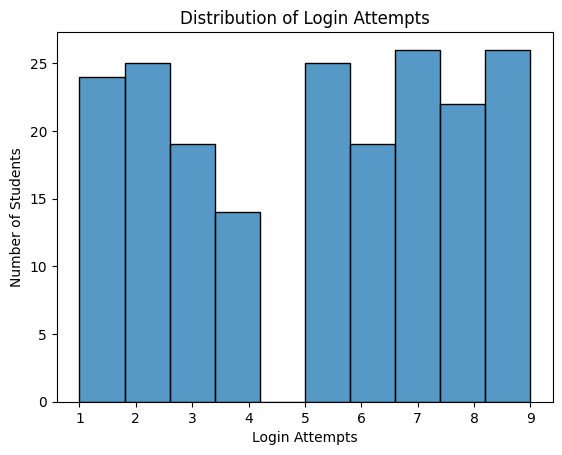

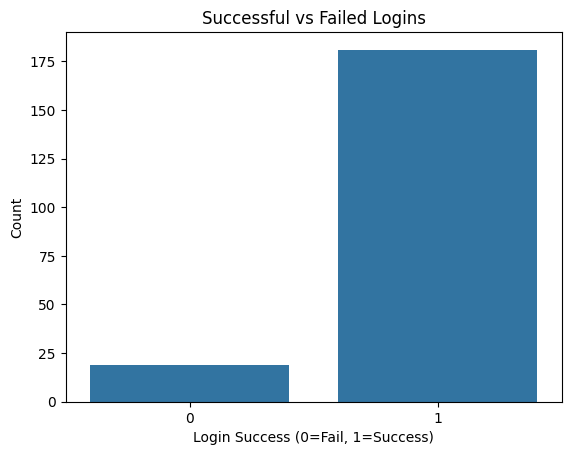

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of login attempts
sns.histplot(students['login_attempts'], bins=10, kde=False)
plt.title("Distribution of Login Attempts")
plt.xlabel("Login Attempts")
plt.ylabel("Number of Students")
plt.show()

# Count of successful vs failed logins
sns.countplot(x='login_success', data=students)
plt.title("Successful vs Failed Logins")
plt.xlabel("Login Success (0=Fail, 1=Success)")
plt.ylabel("Count")
plt.show()

In [75]:
# Students with many failed login attempts
suspicious_students = students[(students['login_success'] == 0) & (students['login_attempts'] > 5)]

# Show relevant columns
suspicious_students[['student_id', 'major', 'login_attempts', 'ip_address', 'login_success', 'last_login_time']]

,student_id,major,login_attempts,ip_address,login_success,last_login_time
0,1,CS,6,192.168.1.19,0,2025-10-09 09:53:06.910067
15,16,CS,9,192.168.2.68,0,2025-10-21 13:42:07.910171
16,17,Biology,8,192.168.1.228,0,2025-10-05 08:07:32.910173
92,93,Biology,7,192.168.5.111,0,2025-10-19 14:40:30.910310
109,110,Business,8,192.168.0.78,0,2025-10-24 20:38:02.910341
121,122,Business,7,192.168.10.159,0,2025-10-22 05:45:27.910362
150,151,Business,8,192.168.8.110,0,2025-10-22 18:24:46.910413
189,190,Math,8,192.168.6.186,0,2025-10-10 17:21:33.910483


In [76]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Выбираем числовые признаки для модели
X = students[['login_attempts', 'at_risk', 'gpa', 'attendance']]

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем и обучаем модель Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
students['anomaly'] = iso_forest.fit_predict(X_scaled)

# Преобразуем метки: -1 = аномалия, 1 = нормальные
students['anomaly'] = students['anomaly'].replace({1: 0, -1: 1})

# Смотрим первых 10 аномалий
students[students['anomaly'] == 1].head(10)

,student_id,age,major,gpa,attendance,at_risk,last_login_time,login_attempts,ip_address,login_success,anomaly
7,8,24,Business,2.57,98,1,2025-10-29 10:31:38.910156,8,192.168.4.41,1,1
18,19,19,CS,3.27,92,1,2025-10-19 03:49:17.910177,9,192.168.8.40,1,1
35,36,24,Math,2.19,61,1,2025-10-05 03:24:08.910208,5,192.168.2.140,1,1
45,46,21,Biology,3.94,99,1,2025-10-26 15:45:38.910225,2,192.168.10.27,1,1
86,87,21,Math,2.11,73,1,2025-10-19 22:06:33.910299,8,192.168.9.49,1,1
112,113,21,Biology,1.95,63,1,2025-10-12 15:51:11.910346,7,192.168.9.156,1,1
140,141,24,Math,3.03,62,1,2025-10-25 13:56:44.910396,1,192.168.8.119,0,1
156,157,22,Engineering,3.52,97,1,2025-10-26 12:05:48.910424,1,192.168.10.71,1,1
174,175,22,Math,1.77,97,0,2025-10-28 02:31:14.910456,5,192.168.9.243,1,1
184,185,24,CS,2.32,82,1,2025-09-28 17:11:50.910474,1,192.168.3.70,1,1


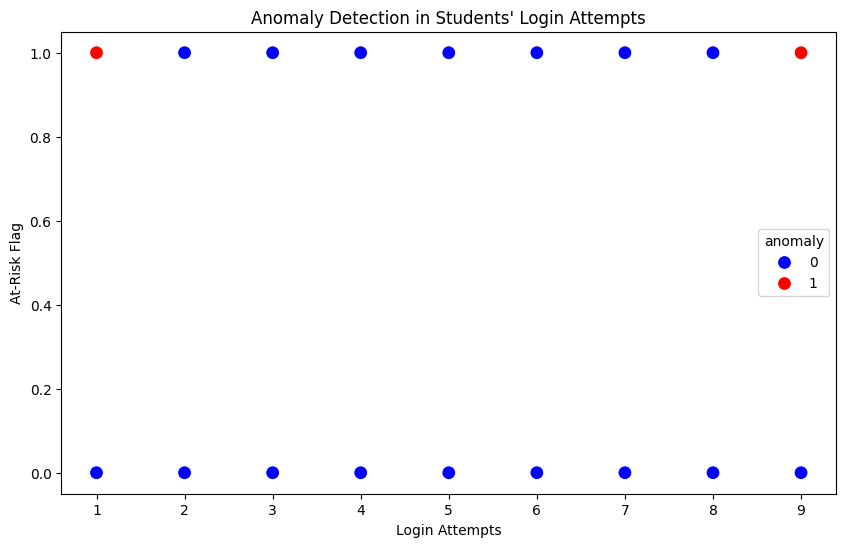

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: login_attempts vs at_risk, highlighting anomalies
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='login_attempts', 
    y='at_risk', 
    hue='anomaly', 
    data=students, 
    palette={0:'blue', 1:'red'},
    s=100
)
plt.title("Anomaly Detection in Students' Login Attempts")
plt.xlabel("Login Attempts")
plt.ylabel("At-Risk Flag")
plt.show()

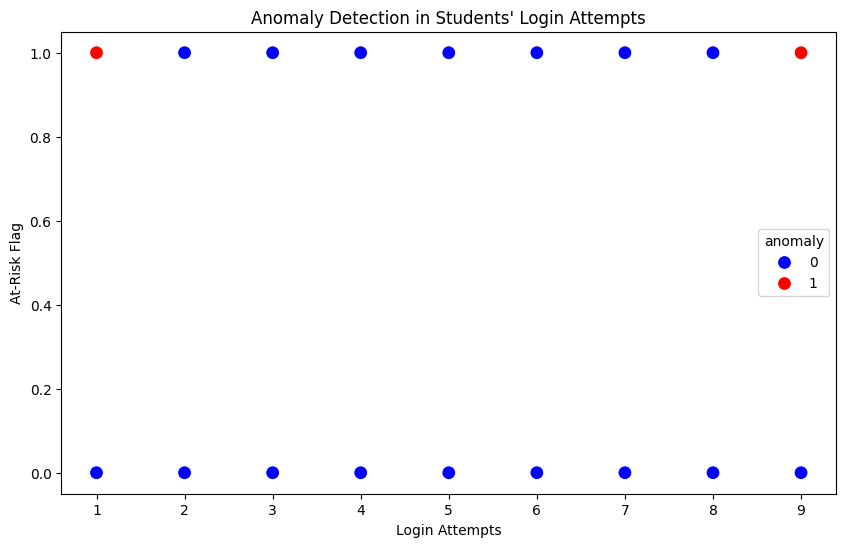

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: login_attempts vs at_risk, highlighting anomalies
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='login_attempts', 
    y='at_risk', 
    hue='anomaly', 
    data=students, 
    palette={0:'blue', 1:'red'},
    s=100
)
plt.title("Anomaly Detection in Students' Login Attempts")
plt.xlabel("Login Attempts")
plt.ylabel("At-Risk Flag")
plt.show()

In [79]:
# Threshold rule: failed login attempts > 5
threshold_anomalies = students[(students['login_success'] == 0) & (students['login_attempts'] > 5)]

# Show result
threshold_anomalies[['student_id', 'login_attempts', 'ip_address', 'login_success', 'last_login_time']]

,student_id,login_attempts,ip_address,login_success,last_login_time
0,1,6,192.168.1.19,0,2025-10-09 09:53:06.910067
15,16,9,192.168.2.68,0,2025-10-21 13:42:07.910171
16,17,8,192.168.1.228,0,2025-10-05 08:07:32.910173
92,93,7,192.168.5.111,0,2025-10-19 14:40:30.910310
109,110,8,192.168.0.78,0,2025-10-24 20:38:02.910341
121,122,7,192.168.10.159,0,2025-10-22 05:45:27.910362
150,151,8,192.168.8.110,0,2025-10-22 18:24:46.910413
189,190,8,192.168.6.186,0,2025-10-10 17:21:33.910483


In [80]:
# Flag students detected by threshold or Isolation Forest
students['suspicious'] = 0
students.loc[(students['anomaly'] == 1) | ((students['login_success'] == 0) & (students['login_attempts'] > 5)), 'suspicious'] = 1

# Show suspicious students
suspicious_students = students[students['suspicious'] == 1]
suspicious_students[['student_id', 'major', 'login_attempts', 'ip_address', 'login_success', 'last_login_time', 'anomaly']]

,student_id,major,login_attempts,ip_address,login_success,last_login_time,anomaly
0,1,CS,6,192.168.1.19,0,2025-10-09 09:53:06.910067,0
7,8,Business,8,192.168.4.41,1,2025-10-29 10:31:38.910156,1
15,16,CS,9,192.168.2.68,0,2025-10-21 13:42:07.910171,0
16,17,Biology,8,192.168.1.228,0,2025-10-05 08:07:32.910173,0
18,19,CS,9,192.168.8.40,1,2025-10-19 03:49:17.910177,1
35,36,Math,5,192.168.2.140,1,2025-10-05 03:24:08.910208,1
45,46,Biology,2,192.168.10.27,1,2025-10-26 15:45:38.910225,1
86,87,Math,8,192.168.9.49,1,2025-10-19 22:06:33.910299,1
92,93,Biology,7,192.168.5.111,0,2025-10-19 14:40:30.910310,0
109,110,Business,8,192.168.0.78,0,2025-10-24 20:38:02.910341,0


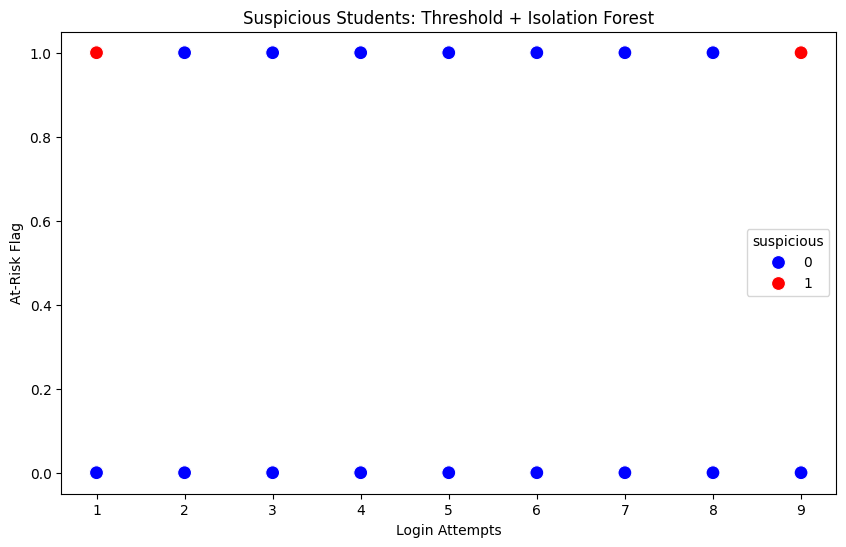

In [81]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='login_attempts',
    y='at_risk',
    hue='suspicious',
    data=students,
    palette={0:'blue', 1:'red'},
    s=100
)
plt.title("Suspicious Students: Threshold + Isolation Forest")
plt.xlabel("Login Attempts")
plt.ylabel("At-Risk Flag")
plt.show()

Suspicious students:


,student_id,major,login_attempts,ip_address,login_success,last_login_time,anomaly,threshold_flag,cluster
0,1,CS,6,192.168.1.19,0,2025-10-09 09:53:06.910067,0,1,1
15,16,CS,9,192.168.2.68,0,2025-10-21 13:42:07.910171,0,1,1
16,17,Biology,8,192.168.1.228,0,2025-10-05 08:07:32.910173,0,1,1
18,19,CS,9,192.168.8.40,1,2025-10-19 03:49:17.910177,1,0,1
38,39,Engineering,7,192.168.8.38,1,2025-10-17 03:49:04.910213,1,0,0
56,57,Business,4,192.168.5.201,1,2025-10-17 04:11:25.910245,1,0,0
92,93,Biology,7,192.168.5.111,0,2025-10-19 14:40:30.910310,0,1,1
109,110,Business,8,192.168.0.78,0,2025-10-24 20:38:02.910341,0,1,1
112,113,Biology,7,192.168.9.156,1,2025-10-12 15:51:11.910346,1,0,1
121,122,Business,7,192.168.10.159,0,2025-10-22 05:45:27.910362,0,1,1


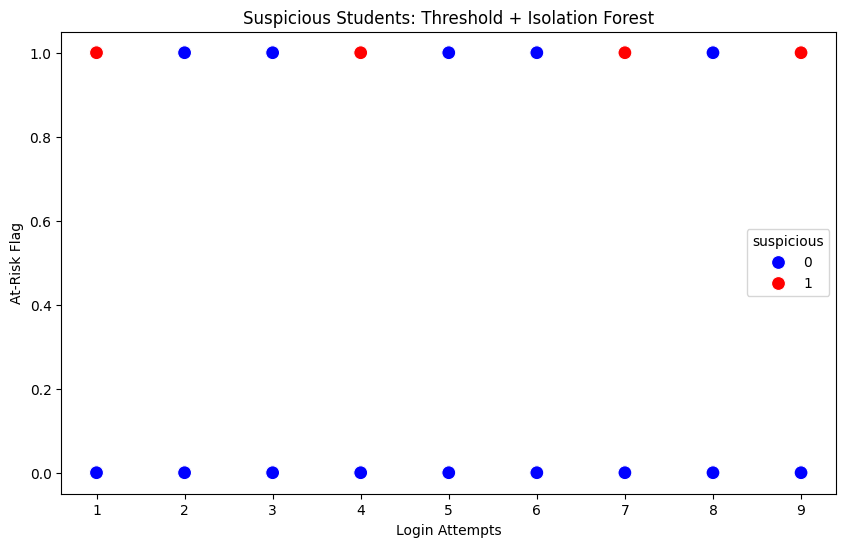

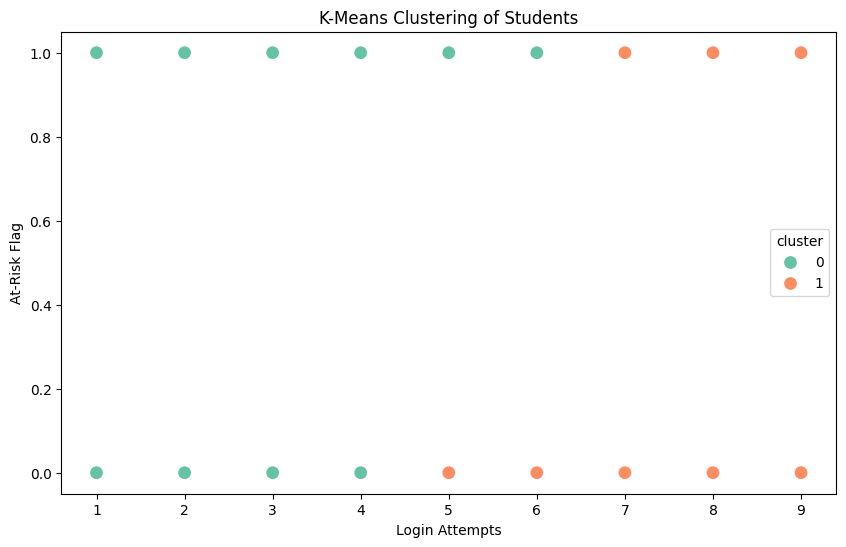

In [82]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1️⃣ Threshold rule
# ---------------------------
students['threshold_flag'] = 0
students.loc[(students['login_success'] == 0) & (students['login_attempts'] > 5), 'threshold_flag'] = 1

# ---------------------------
# 2️⃣ Isolation Forest
# ---------------------------
features = ['login_attempts', 'at_risk']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(students[features])

iso_forest = IsolationForest(contamination=0.05, random_state=42)
students['anomaly'] = iso_forest.fit_predict(X_scaled)
students['anomaly'] = students['anomaly'].replace({1: 0, -1: 1})

# ---------------------------
# 3️⃣ Combine suspicious flags
# ---------------------------
students['suspicious'] = 0
students.loc[(students['threshold_flag'] == 1) | (students['anomaly'] == 1), 'suspicious'] = 1

# ---------------------------
# 4️⃣ K-Means Clustering
# ---------------------------
cluster_features = ['login_attempts', 'at_risk', 'gpa', 'attendance']
X_cluster = StandardScaler().fit_transform(students[cluster_features])
kmeans = KMeans(n_clusters=2, random_state=42)
students['cluster'] = kmeans.fit_predict(X_cluster)

# ---------------------------
# 5️⃣ Table of suspicious students
# ---------------------------
suspicious_students = students[students['suspicious'] == 1]
print("Suspicious students:")
display(suspicious_students[['student_id', 'major', 'login_attempts', 'ip_address', 
                             'login_success', 'last_login_time', 'anomaly', 'threshold_flag', 'cluster']])

# ---------------------------
# 6️⃣ Visualization
# ---------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='login_attempts',
    y='at_risk',
    hue='suspicious',
    data=students,
    palette={0:'blue', 1:'red'},
    s=100
)
plt.title("Suspicious Students: Threshold + Isolation Forest")
plt.xlabel("Login Attempts")
plt.ylabel("At-Risk Flag")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='login_attempts',
    y='at_risk',
    hue='cluster',
    data=students,
    palette='Set2',
    s=100
)
plt.title("K-Means Clustering of Students")
plt.xlabel("Login Attempts")
plt.ylabel("At-Risk Flag")
plt.show()

In [83]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data.csv')

# Show first few rows
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [84]:
df = df.rename(columns={
    'TransactionID': 'LoginID',
    'AccountID': 'StudentID',
    'TransactionAmount': 'SessionDuration',
    'TransactionDate': 'LoginTime',
    'TransactionType': 'LoginType',
    'Location': 'Location',
    'DeviceID': 'DeviceID',
    'IP Address': 'IPAddress',
    'MerchantID': 'CourseID',
    'Channel': 'LoginMethod',
    'CustomerAge': 'Age',
    'CustomerOccupation': 'Occupation',
    'TransactionDuration': 'ActivityDuration',
    'LoginAttempts': 'LoginAttempts',
    'AccountBalance': 'AccountBalance',
    'PreviousTransactionDate': 'PreviousLoginTime'
})


In [85]:
print(df.columns)

Index(['LoginID', 'StudentID', 'SessionDuration', 'LoginTime', 'LoginType',
       'Location', 'DeviceID', 'IPAddress', 'CourseID', 'LoginMethod', 'Age',
       'Occupation', 'ActivityDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousLoginTime'],
      dtype='object')


In [86]:
# Step 3: Clean data
# Remove duplicate rows (if any)
df = df.drop_duplicates()

# Handle missing values
df = df.dropna()  # or you can fill them: df = df.fillna(0)

# Convert date columns to datetime format
df['LoginTime'] = pd.to_datetime(df['LoginTime'])
df['PreviousLoginTime'] = pd.to_datetime(df['PreviousLoginTime'])

print("✅ Data cleaned successfully!")
print(df.info())

✅ Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LoginID            2512 non-null   object        
 1   StudentID          2512 non-null   object        
 2   SessionDuration    2512 non-null   float64       
 3   LoginTime          2512 non-null   datetime64[ns]
 4   LoginType          2512 non-null   object        
 5   Location           2512 non-null   object        
 6   DeviceID           2512 non-null   object        
 7   IPAddress          2512 non-null   object        
 8   CourseID           2512 non-null   object        
 9   LoginMethod        2512 non-null   object        
 10  Age                2512 non-null   int64         
 11  Occupation         2512 non-null   object        
 12  ActivityDuration   2512 non-null   int64         
 13  LoginAttempts      2512 non-null  

In [87]:
from sklearn.preprocessing import StandardScaler

# Step 4: Select numerical features for anomaly detection
features = ['SessionDuration', 'ActivityDuration', 'LoginAttempts', 'AccountBalance', 'Age']
X = df[features]

# Normalize (scale) the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features selected and scaled!")
print(pd.DataFrame(X_scaled, columns=features).head())

✅ Features selected and scaled!
   SessionDuration  ActivityDuration  LoginAttempts  AccountBalance       Age
0        -0.971275         -0.552443      -0.206794       -0.000537  1.423718
1         0.269440          0.305314      -0.206794        2.216472  1.311287
2        -0.586882         -0.909842      -0.206794       -1.023534 -1.443277
3        -0.387456         -1.353017      -0.206794        0.885797 -1.049768
4        -0.973468          1.120184      -0.206794        0.593589 -1.049768


In [88]:
from sklearn.ensemble import IsolationForest

# Step 5: Apply Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = model.fit_predict(X_scaled)

# Mark anomalies clearly
df['anomaly'] = df['anomaly_score'].apply(lambda x: 'Suspicious' if x == -1 else 'Normal')

# Show results
print("✅ Isolation Forest model applied successfully!")
print(df['anomaly'].value_counts())
print(df.head())

✅ Isolation Forest model applied successfully!
anomaly
Normal        2386
Suspicious     126
Name: count, dtype: int64
    LoginID StudentID  SessionDuration           LoginTime LoginType  \
0  TX000001   AC00128            14.09 2023-04-11 16:29:14     Debit   
1  TX000002   AC00455           376.24 2023-06-27 16:44:19     Debit   
2  TX000003   AC00019           126.29 2023-07-10 18:16:08     Debit   
3  TX000004   AC00070           184.50 2023-05-05 16:32:11     Debit   
4  TX000005   AC00411            13.45 2023-10-16 17:51:24    Credit   

    Location DeviceID       IPAddress CourseID LoginMethod  Age Occupation  \
0  San Diego  D000380  162.198.218.92     M015         ATM   70     Doctor   
1    Houston  D000051     13.149.61.4     M052         ATM   68     Doctor   
2       Mesa  D000235  215.97.143.157     M009      Online   19    Student   
3    Raleigh  D000187  200.13.225.150     M002      Online   26    Student   
4    Atlanta  D000308    65.164.3.100     M091      Online

In [89]:
# Step 6: Apply rule-based detection
def rule_based_flags(row):
    if (row['LoginAttempts'] > 3) or (row['SessionDuration'] > 300) or (row['AccountBalance'] > 20000):
        return 1  # Suspicious
    else:
        return 0  # Normal

df['threshold_flag'] = df.apply(rule_based_flags, axis=1)

print("✅ Rule-based detection applied!")
print(df['threshold_flag'].value_counts())

✅ Rule-based detection applied!
threshold_flag
0    1526
1     986
Name: count, dtype: int64


In [ ]:
# Step 7: Merge AI and rule-based detections into a unified risk score
def calculate_risk(row):
    ai_score = 1 if row['anomaly'] == 'Suspicious' else 0
    rule_score = row['threshold_flag']
    return ai_score + rule_score  # total risk score

df['risk_score'] = df.apply(calculate_risk, axis=1)

# Add risk level labels
def label_risk(score):
    if score == 0:
        return 'Low'
    elif score == 1:
        return 'Medium'
    else:
        return 'High'

df['risk_level'] = df['risk_score'].apply(label_risk)

print(" Unified risk score created successfully!")
print(df['risk_level'].value_counts())
print(df[['LoginID', 'anomaly', 'threshold_flag', 'risk_score', 'risk_level']].head())

✅ Unified risk score created successfully!
risk_level
Low       1511
Medium     890
High       111
Name: count, dtype: int64
    LoginID anomaly  threshold_flag  risk_score risk_level
0  TX000001  Normal               0           0        Low
1  TX000002  Normal               1           1     Medium
2  TX000003  Normal               0           0        Low
3  TX000004  Normal               0           0        Low
4  TX000005  Normal               0           0        Low


/var/folders/vd/853__5yd1l3f_6qx8n8nxsd40000gn/T/ipykernel_78576/3628858981.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_level', data=df, palette='viridis')


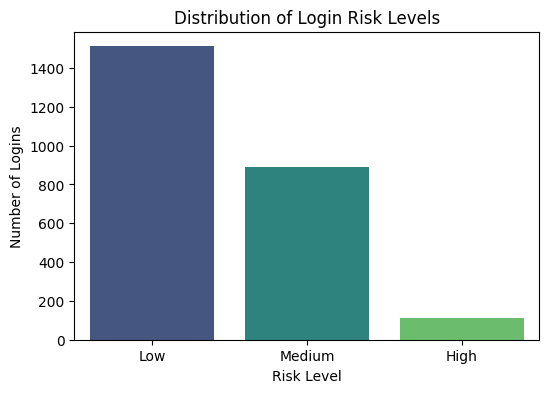

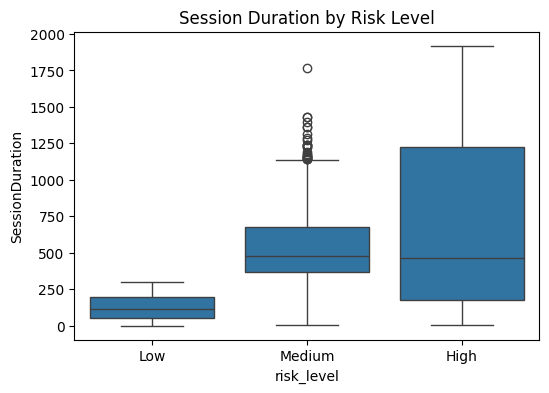

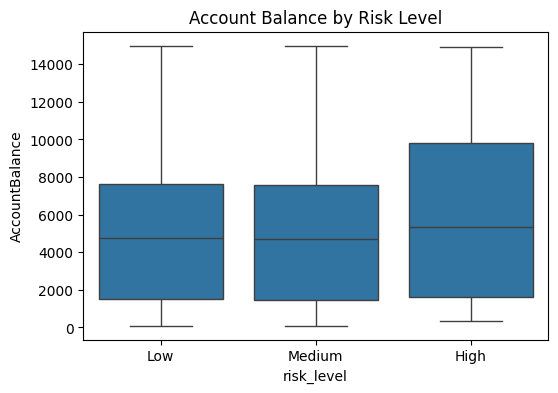

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 8: Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='risk_level', data=df, palette='viridis')
plt.title('Distribution of Login Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Logins')
plt.show()

# Optional: visualize relationship between features and anomalies
plt.figure(figsize=(6,4))
sns.boxplot(x='risk_level', y='SessionDuration', data=df)
plt.title('Session Duration by Risk Level')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='risk_level', y='AccountBalance', data=df)
plt.title('Account Balance by Risk Level')
plt.show()

In [92]:
df.to_csv("cleaned_logins.csv", index=False)

In [93]:
import pandas as pd
import streamlit as st

# Load CSV
df = pd.read_csv("cleaned_logins.csv")

# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Now you can safely access 'risk_level'
st.bar_chart(df['risk_level'].value_counts())

2025-10-29 14:40:57.202 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 14:40:57.248 
  command:

    streamlit run /opt/homebrew/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-10-29 14:40:57.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 14:40:57.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()